In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [2]:
file_path = 'CC GENERAL.csv'
df = pd.read_csv(file_path)

In [3]:
# A. Check the shape of the dataset
print(f"Shape of the dataset: {df.shape}")

Shape of the dataset: (8950, 18)


In [4]:
# B. Check the data quality and assess any issues
# a. Print basic statistics for numerical columns
print(df.describe())

            BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000

In [6]:
# b. Handling Missing Values: Drop rows with missing values in 'CREDIT LIMIT' and 'MINIMUM PAYMENTS'
df = df.dropna(subset=['CREDIT_LIMIT', 'MINIMUM_PAYMENTS'])

In [7]:
# c. Feature Removal: Drop 'CUST_ID'
df = df.drop(columns=['CUST_ID'])

In [9]:
# d. Correlation Handling: Drop specific columns
columns_to_drop = ['PURCHASES_INSTALLMENTS_FREQUENCY', 'ONEOFF_PURCHASES', 'CASH_ADVANCE_FREQUENCY']
df = df.drop(columns=columns_to_drop)

In [10]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [11]:
# Check for outliers using the IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
print(f"Number of outliers in each column: \n{outliers}")

Number of outliers in each column: 
BALANCE                        666
BALANCE_FREQUENCY             1511
PURCHASES                      768
INSTALLMENTS_PURCHASES         811
CASH_ADVANCE                   977
PURCHASES_FREQUENCY              0
ONEOFF_PURCHASES_FREQUENCY     749
CASH_ADVANCE_TRX               794
PURCHASES_TRX                  716
CREDIT_LIMIT                   243
PAYMENTS                       785
MINIMUM_PAYMENTS               841
PRC_FULL_PAYMENT              1343
TENURE                        1290
dtype: int64


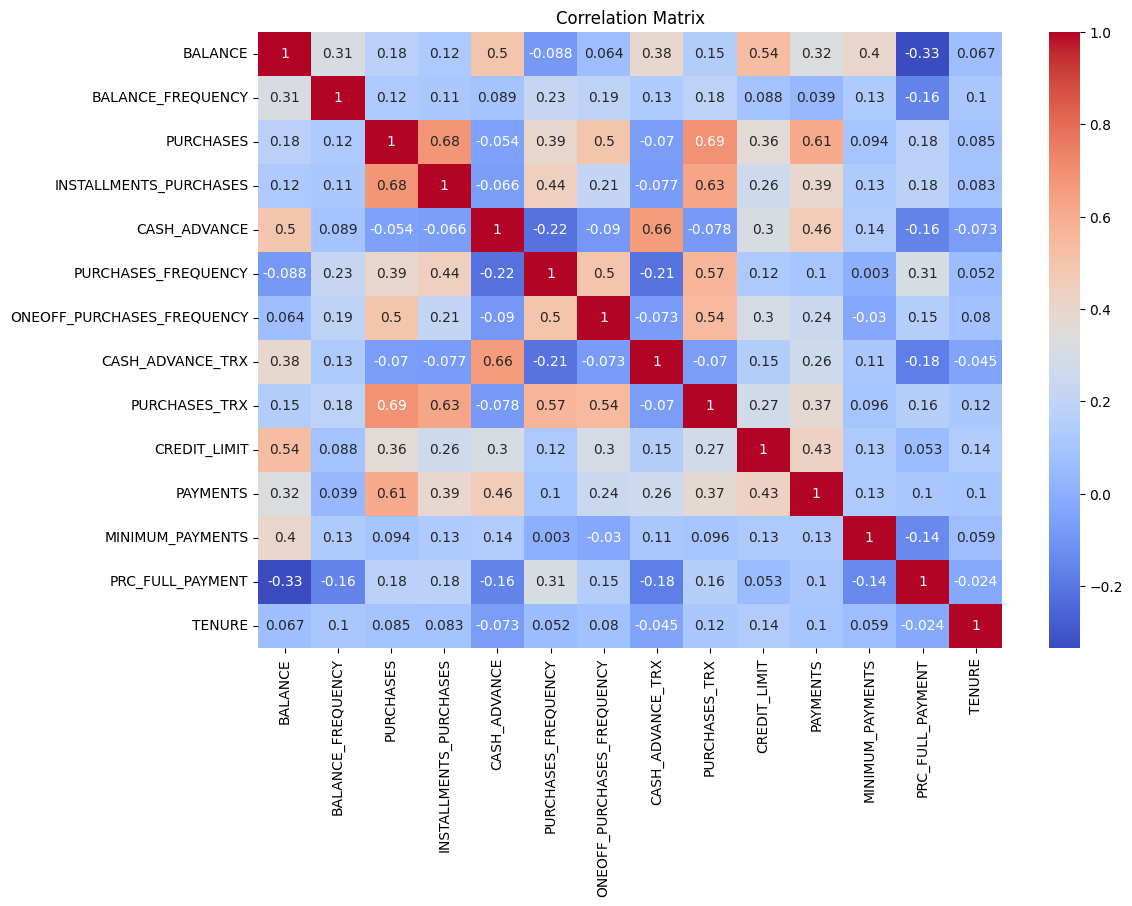

In [12]:
# B. c. Plot the correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [13]:
# D. Apply K-Means Clustering with varying value of K
# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [14]:
# Apply K-Means Clustering with varying values of K
sse = []
silhouette_scores = []
K_range = range(2, 11)

In [15]:
for K in K_range:
    kmeans = KMeans(n_clusters=K, random_state=42)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

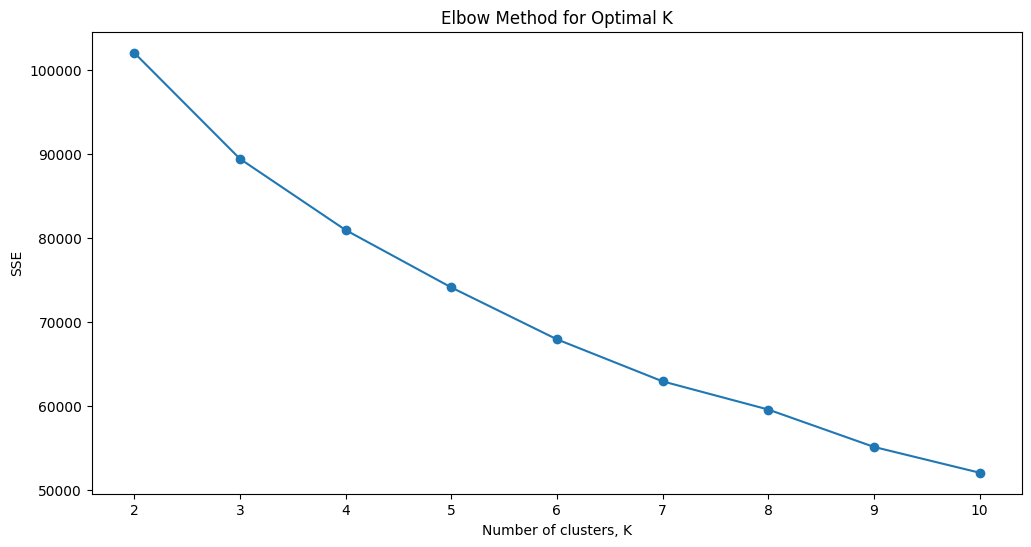

In [16]:
# Plot SSE (Elbow Method)
plt.figure(figsize=(12,6))
plt.plot(K_range, sse, marker='o')
plt.xlabel('Number of clusters, K')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal K')
plt.show()

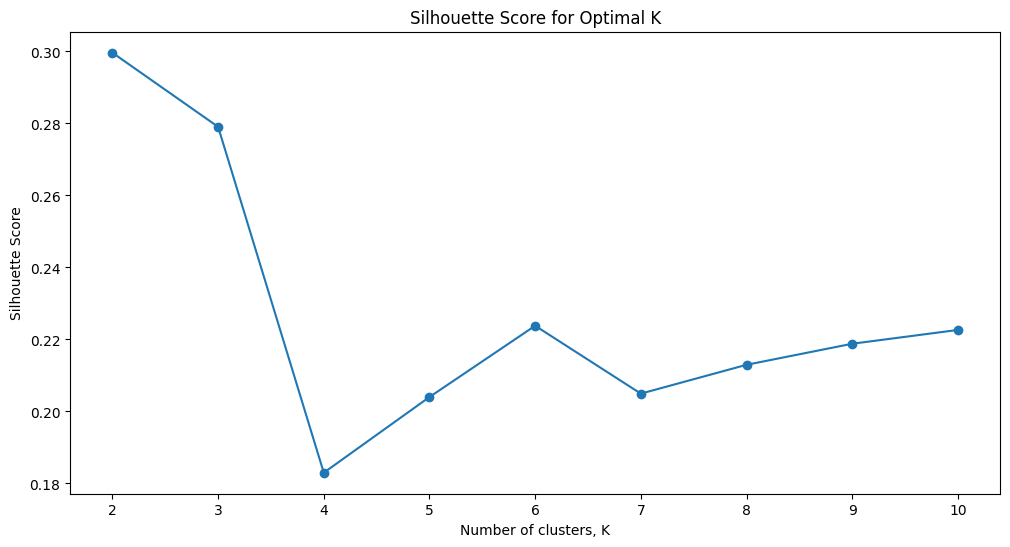

In [17]:
# Plot Silhouette Scores
plt.figure(figsize=(12,6))
plt.plot(K_range, silhouette_scores, marker='o')
plt.xlabel('Number of clusters, K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal K')
plt.show()

In [18]:
# E. Evaluate the performance of the Model
# Print silhouette scores for each K
for K, score in zip(K_range, silhouette_scores):
    print(f'Silhouette Score for K={K}: {score}')

Silhouette Score for K=2: 0.29963415793947085
Silhouette Score for K=3: 0.27905193817390617
Silhouette Score for K=4: 0.18297521999280889
Silhouette Score for K=5: 0.20400178608697372
Silhouette Score for K=6: 0.22379632605067662
Silhouette Score for K=7: 0.20494245767838937
Silhouette Score for K=8: 0.21295189687552132
Silhouette Score for K=9: 0.21879954251802522
Silhouette Score for K=10: 0.22263352948911727


In [19]:
# F. Discuss the results
# Based on the plots and silhouette scores, we can choose the optimal number of clusters.
optimal_K = K_range[np.argmax(silhouette_scores)]
print(f'The optimal number of clusters is: {optimal_K}')

The optimal number of clusters is: 2


In [20]:
# Fit the model with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_K, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [21]:
# Print the first few rows of the dataframe with cluster labels
print(df.head())

       BALANCE  BALANCE_FREQUENCY  PURCHASES  INSTALLMENTS_PURCHASES  \
0    40.900749           0.818182      95.40                   95.40   
1  3202.467416           0.909091       0.00                    0.00   
2  2495.148862           1.000000     773.17                    0.00   
4   817.714335           1.000000      16.00                    0.00   
5  1809.828751           1.000000    1333.28                 1333.28   

   CASH_ADVANCE  PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
0      0.000000             0.166667                    0.000000   
1   6442.945483             0.000000                    0.000000   
2      0.000000             1.000000                    1.000000   
4      0.000000             0.083333                    0.083333   
5      0.000000             0.666667                    0.000000   

   CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT     PAYMENTS  \
0                 0              2        1000.0   201.802084   
1                 4         